In [120]:
import pandas as pd
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [121]:
# загрузка данных
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [122]:
clf = DecisionTreeClassifier()

In [123]:
# посмотрим на данные
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
df_train.shape

(891, 12)

In [126]:
# посомтрим на пропуски
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [127]:
# выбросим 2 записи, у которых нет Embarked
df_train = df_train[df_train['Embarked'].notnull()]

In [128]:
# объединим тестовую выборку и трейн, чтобы вместе предобработать
cnt = len(df_train)
df_y = df_train['Survived']
df_train.drop('Survived', axis=1, inplace=True)

df_train = pd.concat([df_train, df_test], axis=0)

In [129]:
# есть идея проверить и создать интересную фичу из имени и фамилии - там есть, как я понимаю, девечьи имена женщин, 
# поставим 1 если такое есть имя в скобочках и 0 если нет, а если пол мужской поставим -1
df_train['Married'] = np.where((df_train['Name'].str.contains('\\(')) & (df_train['Name'].str.contains('\\)')), 1, 0)
df_train['Married'] = np.where(df_train['Sex'] == 'male', -1, df_train['Married'])

In [130]:
# есть предположение, что билеты с буквами отличаются от простых числовых
df_train['Ticket_with_digits'] = np.where(df_train['Ticket'].str.isdigit(), 1, 0)

In [131]:
# отметим там, где есть номер кабины
df_train['Cabin_exist'] = np.where(df_train['Cabin'].notnull(), 1, 0)

In [132]:
# удалим из рассмотрения столбец с id пассажира, так как он не отражает связи с какими либо данными - просто порядковый номер
# удалим также обработанные столбцы ранее
df_train.drop('PassengerId', axis=1, inplace = True)
df_train.drop('Ticket', axis=1, inplace = True)
df_train.drop('Cabin', axis=1, inplace = True)
df_train.drop('Name', axis=1, inplace = True)

In [133]:
# разберемся с категориальными признаками
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])

In [134]:
# проверим возраст на адекватность
df_train[(df_train.Age < 1) | (df_train.Age > 100)]

,Pclass,Age,SibSp,Parch,Fare,Married,Ticket_with_digits,Cabin_exist,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
78,2,0.83,0,2,29.0000,-1,1,0,0.0,1.0,0.0,0.0,1.0
305,1,0.92,1,2,151.5500,-1,1,1,0.0,1.0,0.0,0.0,1.0
469,3,0.75,2,1,19.2583,0,1,0,1.0,0.0,1.0,0.0,0.0
644,3,0.75,2,1,19.2583,0,1,0,1.0,0.0,1.0,0.0,0.0
755,2,0.67,1,1,14.5000,-1,1,0,0.0,1.0,0.0,0.0,1.0
803,3,0.42,0,1,8.5167,-1,1,0,0.0,1.0,1.0,0.0,0.0
831,2,0.83,1,1,18.7500,-1,1,0,0.0,1.0,0.0,0.0,1.0
201,3,0.33,0,2,14.4000,-1,1,0,0.0,1.0,0.0,0.0,1.0
250,2,0.92,1,2,27.7500,0,0,0,1.0,0.0,0.0,0.0,1.0
281,3,0.75,1,1,13.7750,-1,0,0,0.0,1.0,0.0,0.0,1.0


In [135]:
#  заменим все значения меньше нуля 1
df_train.loc[df_train.Age < 1, 'Age'] = 1

In [136]:
# заменим все значения меньше единицы 1 на медиану
df_train.loc[df_train.Fare < 1, 'Fare'] = df_train.Fare.mean()

In [137]:
# запомним имена колонок
columns_names = df_train.columns

In [138]:
# заменим все NaN средними
from sklearn.preprocessing import Imputer
fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)
df_train = fill_NaN.fit_transform(df_train)

In [139]:
from sklearn.model_selection import GridSearchCV
depths = np.arange(1,10)
features_num = np.arange(3,10)
grid = {'max_depth': depths, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)

In [140]:
gridsearch.fit(df_train[0:cnt], df_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': array([3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [141]:
gridsearch.grid_scores_

/Users/rogotulka/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.75703, std: 0.05091, params: {'max_features': 3, 'max_depth': 1},
 mean: 0.72216, std: 0.08536, params: {'max_features': 4, 'max_depth': 1},
 mean: 0.74803, std: 0.06980, params: {'max_features': 5, 'max_depth': 1},
 mean: 0.76828, std: 0.04103, params: {'max_features': 6, 'max_depth': 1},
 mean: 0.78628, std: 0.01847, params: {'max_features': 7, 'max_depth': 1},
 mean: 0.78628, std: 0.01847, params: {'max_features': 8, 'max_depth': 1},
 mean: 0.78628, std: 0.01847, params: {'max_features': 9, 'max_depth': 1},
 mean: 0.74916, std: 0.04296, params: {'max_features': 3, 'max_depth': 2},
 mean: 0.79415, std: 0.01174, params: {'max_features': 4, 'max_depth': 2},
 mean: 0.79078, std: 0.01100, params: {'max_features': 5, 'max_depth': 2},
 mean: 0.77503, std: 0.02149, params: {'max_features': 6, 'max_depth': 2},
 mean: 0.78178, std: 0.02109, params: {'max_features': 7, 'max_depth': 2},
 mean: 0.77278, std: 0.01884, params: {'max_features': 8, 'max_depth': 2},
 mean: 0.78628, std: 0.01

In [142]:
scores = [-x.mean_validation_score for x in gridsearch.grid_scores_]
best_point = np.argmin(scores)

/Users/rogotulka/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [143]:
gridsearch.best_params_

{'max_depth': 5, 'max_features': 5}

In [144]:
clf_final = DecisionTreeClassifier(max_depth=6, max_features=6)

In [145]:
clf_final.fit(df_train[0:cnt], df_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [146]:
predicted = clf_final.predict(df_train[cnt:])

In [147]:
importances = clf_final.feature_importances_

In [148]:
# сохранение результатов
with open('submission.txt', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, y in zip(df_test['PassengerId'], predicted):
        out.write('%s,%s\n' % (passenger, y))

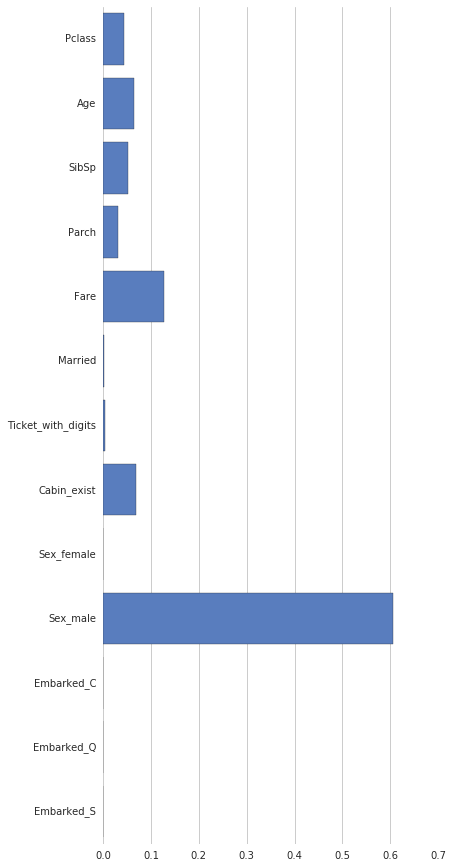

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))




sns.barplot(x=importances, y=columns_names,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")

sns.despine(left=True, bottom=True)